In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import sys
sys.path.insert(0, '../scripts/')

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from datetime import datetime, timedelta
from plots import Plots
from data_cleaning import DataCleaner
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump
import datetime
%matplotlib inline

In [156]:
pwd = os.getcwd()

train_file_path = os.path.join(pwd, os.pardir, "data/train_clean.csv")
test_file_path = os.path.join(pwd, os.pardir, "data/test_clean.csv")
store_file_path = os.path.join(pwd, os.pardir, "data/store_clean.csv")

In [157]:
df_train = pd.read_csv(train_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_test = pd.read_csv(test_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_store = pd.read_csv(store_file_path)

In [132]:
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')

In [153]:
df_train_store["Weekday"] = df_train_store.apply(lambda x: 1 if x["DayOfWeek"] >= 5 else 0, axis=1)

In [155]:
df_train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,NaN,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,NaN,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,NaN,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,NaN,0


In [133]:
data_cleaner_train = DataCleaner(df_train_store)

In [134]:
data_cleaner_train.remove_closed_stores()

In [135]:
data_cleaner_train.remove_outliers("Sales")

<AxesSubplot:ylabel='Frequency'>

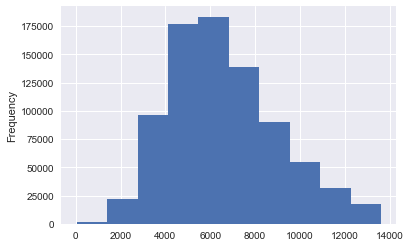

In [136]:
data_cleaner_train.dataframe["Sales"].plot(kind="hist")

In [137]:
data_cleaner_train.scale_dataframe()

In [138]:
scaled_df_train = data_cleaner_train.dataframe

In [139]:
scaled_df_train

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,-1.723137,0.848235,-0.546063,-0.535808,0.0,1.137629,2.049443,-0.541901,0.948218,0.683667,-1.013415,-0.766266,-1.013415
1,-1.720041,0.848235,-0.215209,-0.306968,0.0,1.137629,2.049443,-0.631367,1.414336,0.682599,0.986762,0.082140,0.985015
2,-1.716946,0.848235,0.714155,0.333785,0.0,1.137629,2.049443,1.101715,1.647395,0.681531,0.986762,0.147402,0.986009
3,-1.710755,0.848235,-0.728218,-0.522732,0.0,1.137629,2.049443,3.118531,-0.217078,0.691144,-1.013415,-0.766266,-1.013415
4,-1.707660,0.848235,-0.385799,-0.424657,0.0,1.137629,2.049443,-0.664597,1.647395,0.689008,-1.013415,-0.766266,-1.013415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813564,0.384777,-0.901732,-1.325903,-0.499848,0.0,-0.879021,2.049443,-0.685046,0.948218,0.681531,-1.013415,-0.766266,-1.013415
813565,0.542639,-0.901732,1.726543,5.420577,0.0,-0.879021,2.049443,-0.594302,1.181277,0.674054,-1.013415,-0.766266,-1.013415
813566,0.654070,-0.901732,-0.640239,1.729710,0.0,-0.879021,2.049443,-0.596858,-1.149315,-1.461092,0.986762,2.366310,0.987003
813567,1.208133,-0.901732,-0.864938,1.046459,0.0,-0.879021,2.049443,-0.521451,-1.149315,-1.461092,-1.013415,-0.766266,-1.013415


In [140]:
X = scaled_df_train
y = scaled_df_train.drop(columns=["Sales"], axis=1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [142]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=16, n_jobs=-1)

In [143]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=10, n_jobs=-1)

In [144]:
y_pred = regressor.predict(X_test)

In [145]:
score = regressor.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9971698116784244


In [146]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.00333548616145578
RMSE:  0.00166774308072789


In [147]:
model_timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_file_path = os.path.join(pwd, os.pardir, 'models')

In [102]:
dump(filename=f'{model_file_path}/{model_timestamp}.pkl', value=regressor, compress=9)

['c:\\Users\\user\\Desktop\\10_Academy\\Week_3\\Technical\\Pharmaceutical-Sales\\notebooks\\..\\models/2022-05-28-12-46-33.pkl']

In [148]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": regressor.feature_importances_})

In [149]:
feature_importance

,Feature,Importance
0,Store,0.090851
1,DayOfWeek,0.081787
2,Sales,0.000578
3,Customers,0.079478
4,Open,0.000000
5,Promo,0.101855
6,SchoolHoliday,0.093609
7,CompetitionDistance,0.089949
8,CompetitionOpenSinceMonth,0.140784
9,CompetitionOpenSinceYear,0.040025


In [150]:
plt.style.use('seaborn')

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

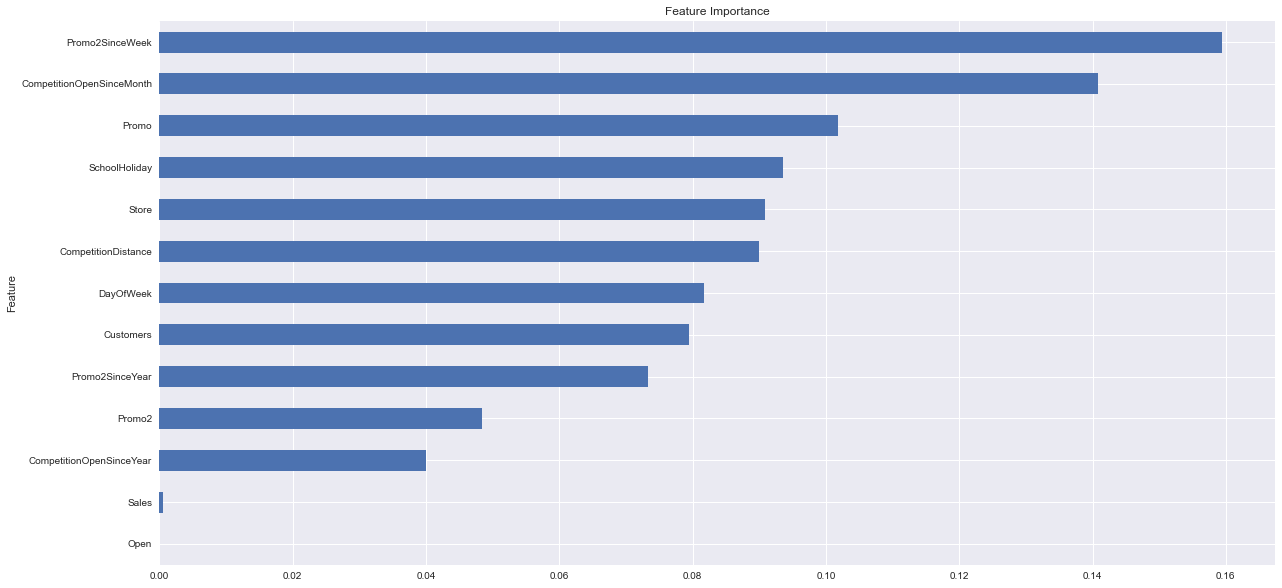

In [151]:
feature_importance.sort_values(by="Importance").plot(kind="barh", x="Feature", y="Importance", title="Feature Importance", legend=False, figsize=(20, 10))